# Exploratory Data Analysis

## Class 514 and 424 Data - Harvard Dataset

### Imports

In [1]:
import pandas as pd
import csv
from datetime import datetime, timedelta
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


This dataset contains the all the patents released in USPTO from 1975 - 2011

It can be found here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SJPHLG

The data countains the patent ID, country of origin, the class, subclass, number of backward and forward citations and more

In [2]:
df = pd.read_csv("data/basicbib.tab",  sep='\t') #importing dataset with pantas


C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:

df_red = df.sample(n=2 * 10**5, random_state=1) #10^5 randomly sampled dataset from the overall dataset
df_red = df_red.sort_values(by=['issuedate']) #sorts the values in increasing order by date of issue

df["issuedate"] = pd.to_datetime(df["issuedate"]).dt.date #change the data format of the issue date to datetime
df_red["issuedate"] = pd.to_datetime(df_red["issuedate"]).dt.date



In [4]:
#dataset of random sampled points with dates between 1990 and 2010
df_red_range = df_red.loc[(df_red["issuedate"] > date(1990, 1,1) )\
                   &     (  df_red["issuedate"] < date(2010, 1,1) )]

In [88]:
df.isna().sum() #checking for nan-values. There are very few, these are filled in with zeros

patent                     0
st_country                 0
assignee                   0
asstype                    0
class                      0
subclass                   0
issuedate                  0
nonutility                 0
appnum                     7
application_date           2
n_claims                1065
claims_info_missing        0
n_bcites                   0
n_fcites               12770
n_nplcites                 0
dtype: int64

In [5]:
df["n_fcites"] = df["n_fcites"].fillna(0)

In [6]:
df = df[df["nonutility"] == 0] # non-utility patents are removed

In [7]:
df = df.loc[df["issuedate"] < date(2010,1,1)] #only considering patents before 2010 

In [93]:
df.columns

Index(['patent', 'st_country', 'assignee', 'asstype', 'class', 'subclass',
       'issuedate', 'nonutility', 'appnum', 'application_date', 'n_claims',
       'claims_info_missing', 'n_bcites', 'n_fcites', 'n_nplcites'],
      dtype='object')

### Counts of classes

Classes 424 and 514 are classes containing patents to do with drugs and pharmaceuticals. 

The paper uses patents from 2000 to 2016. This report uses from 1990 to 2010

In [491]:
#range(2000-2010 and class 424 or 514)
df_2class = df.loc[((df["class"].values == "424") \
               |    (df["class"].values == 424)   \
               |    (df["class"].values == "514") \
               |    (df["class"].values == 514)    )  \
               &    (df["issuedate"] > date(1990, 1,1) )\
               &    (df["issuedate"] < date(2010,1,1))]

In [95]:
(df_2class["issuedate"]<date(2000,1,1)).sum()

46264

## In-links

This is the second dataset and contains the adjacency list of the network.

In [51]:
df_links = pd.read_csv("data/uscites.tab",  sep='\t')

C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [535]:
# performing left join of the adjacancy matrix and the dataset
df_melt = df_2class.merge(df_links, left_on = "patent", right_on = "patent", how = "left") # combine the adjacency list with the dataframe 

In [54]:
""" The dataset now contains as many rows for each patent as number of backward citations. This will help when creating new columns"""
df_melt.head()

,patent,st_country,assignee,class,subclass,issuedate,nonutility,appnum,application_date,n_claims,...,asstype_7,count_by_assignee_all,count_by_assignee_class,inl_by_assignee_all,inl_by_assignee_424,inl_by_assignee_other,FC3_cat_quartiles,FC5_cat_quartiles,FC10_cat_quartiles,cited
0,4891208,PA,339125.0,424,001210,1990-01-02,0.0,6773429.0,1985-09-01,46.0,...,0,14.0,0.0,61.142857,0.0,61.142857,3,3,3,3932657.0
1,4891208,PA,339125.0,424,001210,1990-01-02,0.0,6773429.0,1985-09-01,46.0,...,0,14.0,0.0,61.142857,0.0,61.142857,3,3,3,3957971.0
2,4891208,PA,339125.0,424,001210,1990-01-02,0.0,6773429.0,1985-09-01,46.0,...,0,14.0,0.0,61.142857,0.0,61.142857,3,3,3,4177350.0
3,4891208,PA,339125.0,424,001210,1990-01-02,0.0,6773429.0,1985-09-01,46.0,...,0,14.0,0.0,61.142857,0.0,61.142857,3,3,3,4183847.0
4,4891208,PA,339125.0,424,001210,1990-01-02,0.0,6773429.0,1985-09-01,46.0,...,0,14.0,0.0,61.142857,0.0,61.142857,3,3,3,4235871.0


## Melting all the data

In [55]:
df_melt_all = df.merge(df_links, left_on = "patent", right_on = "patent", how = "left") # combine the adjacency list with the dataframe 

In [19]:
#there are around 39 million citations
df_melt_all.shape

(39957031, 16)

In [98]:
#count number of times each patent has been cited, makes a dictionary
counts = df_melt_all["cited"].value_counts() 

In [99]:
# the in-links all contains in-link data up to 2010
df_2class["inlinks_all"] = [counts[i] if i in counts.keys() else 0 for i in df_2class["patent"]]

<ipython-input-99-ccba440ad3f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2class["inlinks_all"] = [counts[i] if i in counts.keys() else 0 for i in df_2class["patent"]]


In [100]:
df_2class.head()

,patent,st_country,assignee,asstype,class,subclass,issuedate,nonutility,appnum,application_date,n_claims,claims_info_missing,n_bcites,n_fcites,n_nplcites,inlinks_all
1031795,4891208,PA,339125.0,2,424,001210,1990-01-02,0.0,6773429.0,1985-09-01,46.0,0.0,14,39.0,8,38
1031796,4891209,FL,0.0,1,424,048000,1990-01-02,0.0,7247362.0,1988-09-01,1.0,0.0,1,5.0,0,5
1031797,4891210,GA,0.0,1,424,050000,1990-01-02,0.0,7292960.0,1989-01-01,8.0,0.0,10,9.0,0,9
1031798,4891211,NJ,104030.0,2,424,052000,1990-01-02,0.0,7212913.0,1988-06-01,20.0,0.0,3,41.0,0,41
1031799,4891212,PA,264840.0,2,424,059000,1990-01-02,0.0,7290800.0,1988-12-01,14.0,0.0,0,2.0,1,2


## In-links in 3 year range 

In [103]:
# all patents from 1990 to 2010
df_1990 = df.loc[df["issuedate"] >= date(1990,1,1)]

In [155]:
# calculating in-links 3 years after issue for 1000 patents
# these were calculated exactly 3 years after the date without rounding
# this was done to validate the rounding method used later

y3_cites = []
for i in range(len(df_2class)): #for each patent
    patent = df_2class.iloc[i]
    patent_n = patent["patent"]
    dt = patent["issuedate"].replace(year = patent["issuedate"].year + 3) #limit date is set 3 years ahead
    
    upper = df_1990.iloc[:(df_1990["issuedate"] < dt).sum()]["n_bcites"].sum()# indexing
    d = df_melt_all_1990.iloc[ 0 : upper] #patents to check
    
    y3_cites.append((d["cited"] == patent_n).sum()) # checking how many cite the patent 
    
    if i % 100 == 0:
        print(i)

    if i == 1000:
        break

0
100
200
300
400
500
600
700
800
900
1000


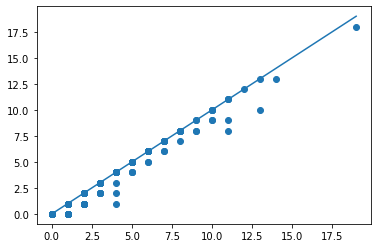

In [156]:
# comparing this method to the method developed later, most patents have identical values
plt.scatter(y3_cites, df_2class["FC3"][:1001])
plt.plot(range(0, 20))

In [158]:
#953/1000 patents have identical values
(y3_cites == df_424["FC3"][:1001]).sum()

953

In [160]:
#the mean squared error is very small, most patents are the same
#the rounding method is valid
mean_squared_error(y3_cites, df_424["FC3"][:1001] )

0.07792207792207792

## In-links 3 years after issue

In [96]:
# list of months in datetime format in 20 years
months = [date(1990 + i//12, i%12 + 1, 1) for i in range(241)]

In [97]:
n_months = [] #index list of patents and months
for i in range(len(months)-1):
    month = months[i]
    next_month = months[i+1]
    n_months.append(((df["issuedate"] >= month)&(df["issuedate"] < next_month)).sum())

In [76]:
#the left join of data but from 1990
df_melt_all_1990 = df_melt_all.loc[df_melt_all["issuedate"] >= date(1990,1,1)]
df_melt_all_1990 = df_melt_all_1990[df_melt_all_1990["cited"].notna()] 

In [108]:
sum(n_months), (df["issuedate"] > date(1990,1,1)).sum()

(2732540, 2732540)

In [112]:
def get_FCN(dataset, N):
    y_cites = []
    count = 0
    for i in range(121): # for each month in the 10 years

        d_1 = dataset.loc[(dataset["issuedate"] >= months[i])&(dataset["issuedate"] < months[i+1])] #grab first month

        #we can get the index in melt using bcites (len(df_melt) = sum(df["n_bcites"]))
        lower = df_1990.iloc[0:sum(n_months[:i])]["n_bcites"].sum() #index in melt of first patent in month
        upper = df_1990.iloc[0:sum(n_months[:i+12*N])]["n_bcites"].sum() #index in melt of last patent in month (using bcites)

        d_N = df_melt_all_1990.iloc[lower:upper] # grab the citations of patents in that month

        print(d_N["issuedate"].min(), d_N["issuedate"].max(), d_N.shape, lower, upper)
        for patent in d_1["patent"]: #for each patent in that month
            y_cites.append((d_N["cited"] == patent).sum())
    return(y_cites)
        

In [1]:
# in-links 3 years after issue, grouped by months
y3_cites = get_FCN(df_2class, 3)

In [60]:
y3_cites_full = np.concatenate([y3_cites, np.zeros(len(df_2class) - len(y3_cites))]) 

In [61]:
df_2class["FC3"] = y3_cites_full

## 5 Year cites from all patents

In [3]:
y5_cites = get_FCN(df_2class, 5) #in-links 5 years after issue

In [65]:
y5_cites_full = np.concatenate([y5_cites, np.zeros(len(df_2class) - len(y5_cites))])

In [66]:
df_2class["FC5"] = y5_cites_full

## 10 Year cites from all patents

In [2]:
y10_cites = get_FCN(df_2class, 10) #FC10

In [76]:
y10_cites_full = np.concatenate([y10_cites, np.zeros(len(df_2class) - len(y10_cites))])

In [77]:
df_2class["FC10"] = y10_cites_full

## Red FCN

In [4]:
#the same is done for the random sample
y3_red = get_FCN(df_red_range, 3)

In [134]:
df_red_range["FC3"] = np.concatenate([y3_red, np.zeros(len(df_red_range) - len(y3_red))])

<ipython-input-134-3e24cfc4e01c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red_range["FC3"] = np.concatenate([y3_red, np.zeros(len(df_red_range) - len(y3_red))])


In [10]:
y5_red = get_FCN(df_red_range, 5)
df_red_range["FC5"] = np.concatenate([y5_red, np.zeros(len(df_red_range) - len(y5_red))])

In [11]:
y10_red = get_FCN(df_red_range, 10)
df_red_range["FC10"] = np.concatenate([y10_red, np.zeros(len(df_red_range) - len(y10_red))])

In [137]:
df_red_range = df_red_range.loc[df_red_range["issuedate"] < date(2000,1,1)]

# 3. Visualising 

## Class analysis

In [12]:
av = []
av424 = []
av514 = []
for i in range(1975, 2010):
    print(i)
    d = df.loc[(df["issuedate"] < date(i+1,1,1)) & (df["issuedate"] > date(i,1,1))]
    
    
    a = (d["issuedate"].groupby(d["class"]).count())
    av.append(np.average(a.values))
    av424.append(a[424])
    av514.append(a[514])


Text(0, 0.5, 'Percentage patents released (%)')

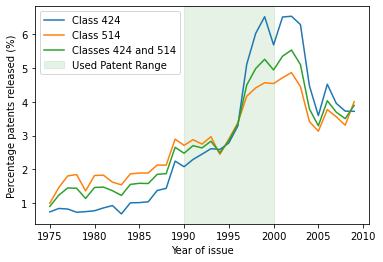

In [21]:
plt.plot(range(1975, 2010), av424/sum(av424) * 100, label = "Class 424")
plt.plot(range(1975, 2010), av514/sum(av514) * 100, label = "Class 514")
plt.plot(df_class["issuedate"].groupby( pd.to_datetime(df_class["issuedate"]).dt.year).count()/len(df_class) * 100, label = "Classes 424 and 514")

plt.axvspan(1990, 2000, alpha = 0.1, color = "g", label = "Used Patent Range")

plt.legend()
plt.xlabel("Year of issue")
plt.ylabel("Percentage patents released (%)")



Text(0, 0.5, 'Patents released')

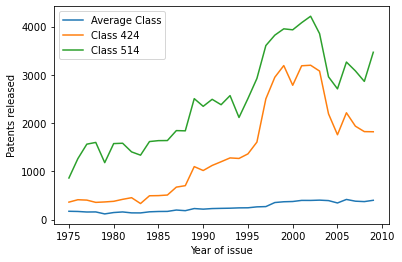

In [22]:
plt.plot(range(1975, 2010), av, label = "Average Class")
plt.plot(range(1975, 2010), av424, label = "Class 424")
plt.plot(range(1975, 2010), av514, label = "Class 514")

plt.legend()
plt.xlabel("Year of issue")
plt.ylabel("Patents released")



Text(0, 0.5, 'Average number of out-links')

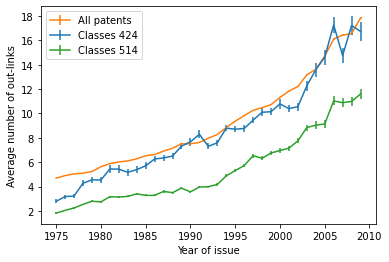

In [29]:
all_bcites = df["n_bcites"].groupby( pd.to_datetime(df["issuedate"]).dt.year)
plt.errorbar([i for i in range(1975, 2010)], all_bcites.mean(), label = "All patents", yerr = all_bcites.std()/np.sqrt(all_bcites.count()-1), fmt='-', c = "C1")

class_bcites = df_class["n_bcites"].groupby( pd.to_datetime(df_class_424["issuedate"]).dt.year)
plt.errorbar([i for i in range(1975, 2010)], class_bcites.mean(), label = "Classes 424", yerr = class_bcites.std()/np.sqrt(class_bcites.count()-1), fmt='-')

class_bcites = df_class["n_bcites"].groupby( pd.to_datetime(df_class_514["issuedate"]).dt.year)
plt.errorbar([i for i in range(1975, 2010)], class_bcites.mean(), label = "Classes 514", yerr = class_bcites.std()/np.sqrt(class_bcites.count()-1), fmt='-', c = "C2")

plt.legend()
plt.xlabel("Year of issue")
plt.ylabel("Average number of out-links")

In [108]:
df_class_514.shape, df_class.shape

((86755, 16), (135803, 16))

Text(0, 0.5, 'Average number of in-links')

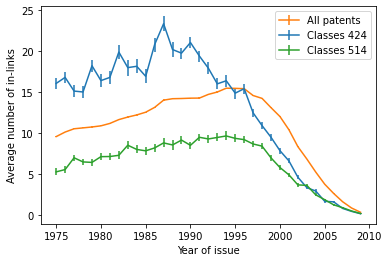

In [30]:
all_bcites = df["n_fcites"].groupby( pd.to_datetime(df["issuedate"]).dt.year)
plt.errorbar([i for i in range(1975, 2010)], all_bcites.mean(), label = "All patents", yerr = all_bcites.std()/np.sqrt(all_bcites.count()-1), fmt='-', c = "C1")


class_bcites = df_class["n_fcites"].groupby( pd.to_datetime(df_class_424["issuedate"]).dt.year)
plt.errorbar([i for i in range(1975, 2010)], class_bcites.mean(), label = "Classes 424", yerr = all_bcites.std()/np.sqrt(class_bcites.count()-1), fmt='-')


class_bcites = df_class["n_fcites"].groupby( pd.to_datetime(df_class_514["issuedate"]).dt.year)
plt.errorbar([i for i in range(1975, 2010)], class_bcites.mean(), label = "Classes 514", yerr = all_bcites.std()/np.sqrt(class_bcites.count()-1), fmt='-', c = "C2")

# print(all_bcites.std(), all_bcites.count() - 1)

plt.legend()
plt.xlabel("Year of issue")
plt.ylabel("Average number of in-links")


Text(0, 0.5, 'avergae number of inlinks')

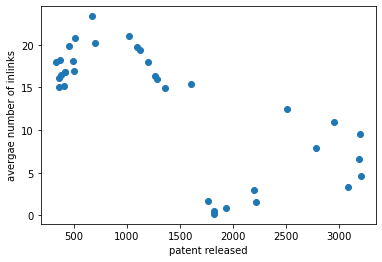

In [33]:
class_bcites = df_class["n_fcites"].groupby( pd.to_datetime(df_class_424["issuedate"]).dt.year)
plt.scatter(av424, class_bcites.mean())
plt.xlabel("patent released")
plt.ylabel("avergae number of inlinks")

Text(0.5, 1.0, 'Number of inlinks vs number of patents released each year')

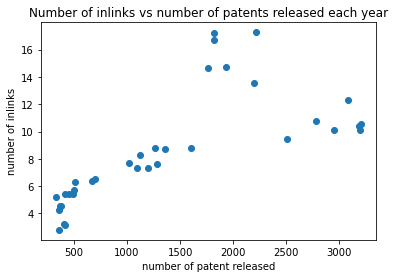

In [42]:
class_bcites = df_class["n_bcites"].groupby( pd.to_datetime(df_class_424["issuedate"]).dt.year)
plt.scatter(av424, class_bcites.mean())
plt.xlabel("number of patent released")
plt.ylabel("number of inlinks")
plt.title("Number of inlinks vs number of patents released each year")

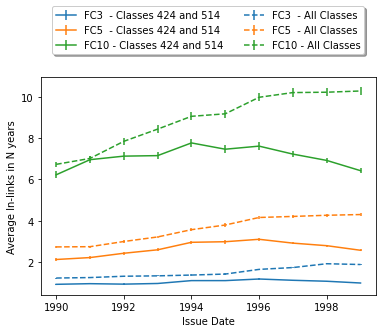

In [199]:
style = ["-", "--"]
labels = [" - Classes 424 and 514", " - All Classes"]
for index, dataset in enumerate([df_2class, df_red_range]):
    
    group = dataset["FC3"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year)
    plt.errorbar([i for i in range(1990, 2000)], group.mean(), yerr = group.std()/np.sqrt(group.count()-1), label = "FC3" + " "+ labels[index], c = "C0", linestyle = style[index])
    
    group = dataset["FC5"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year)
    plt.errorbar([i for i in range(1990, 2000)], group.mean(), yerr = group.std()/np.sqrt(group.count()-1), label = "FC5" + " "+ labels[index], c = "C1", linestyle = style[index])
    
    group = dataset["FC10"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year)
    plt.errorbar([i for i in range(1990, 2000)], group.mean(), yerr = group.std()/np.sqrt(group.count()-1), label = "FC10" + labels[index], c = "C2", linestyle = style[index])
    
# plt.legend()
plt.ylabel("Average In-links in N years")
plt.xlabel("Issue Date")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=2, fancybox=True, shadow=True)


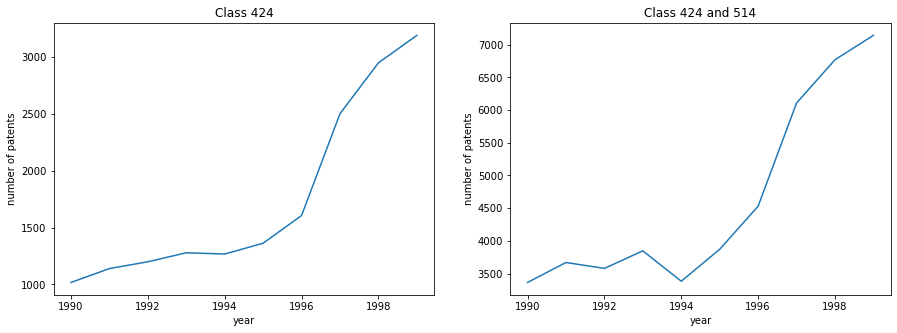

In [16]:
_, ax = plt.subplots(1,2, figsize = (15, 5))

titles = ["Class 424", "Class 424 and 514"]
for index, dataset in enumerate([df_424, df_2class]):
    ax[index].plot(dataset["issuedate"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).count())
    ax[index].set_xlabel("year")
    ax[index].set_ylabel("number of patents")
    ax[index].set_title(titles[index])

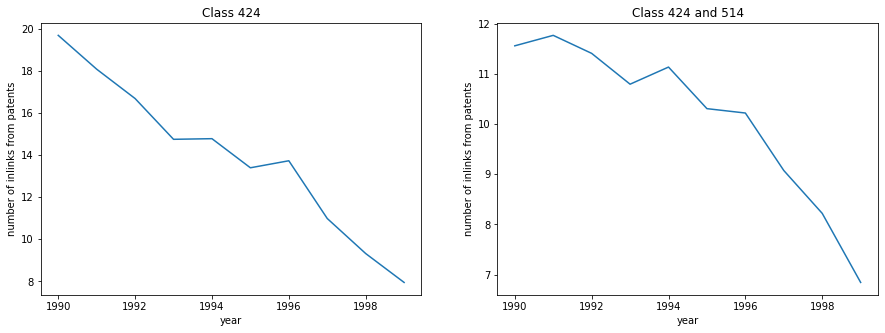

In [17]:
_, ax = plt.subplots(1,2, figsize = (15, 5))

for index, dataset in enumerate([df_424, df_2class]):
    ax[index].plot(dataset["inlinks_all"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).mean())
    ax[index].set_ylabel("number of inlinks from patents")
    ax[index].set_xlabel("year")
    ax[index].set_title(titles[index])

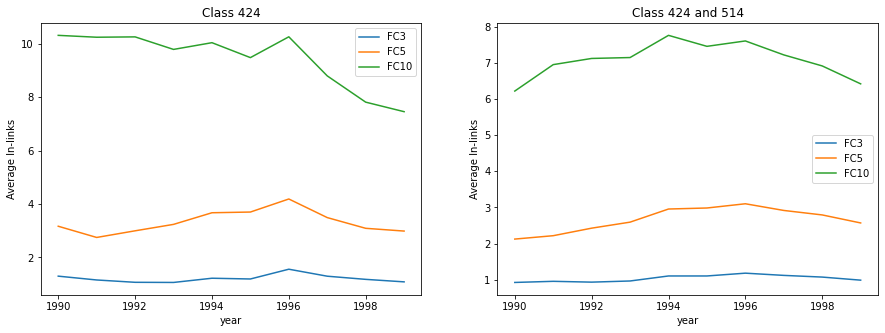

In [21]:
_, ax = plt.subplots(1,2, figsize = (15, 5))

for index, dataset in enumerate([df_424, df_2class]):
    
    ax[index].plot(dataset["FC3"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).mean(), label = "FC3")
    ax[index].plot(dataset["FC5"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).mean(), label = "FC5")
    ax[index].plot(dataset["FC10"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).mean(), label = "FC10")
#     ax[index].plot(df["n_fcites"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).mean(), label ")
    ax[index].set_xlabel("year")
    ax[index].set_ylabel("Average In-links")
    ax[index].legend()
    ax[index].set_title(titles[index])

## Overall Data

### Plotting together 

# Degree distributions

## Inlinks

<ipython-input-459-6cc0db93390b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new, fontsize = 13)


[Text(0, 0.2, '$\\mathdefault{10^{10^{0.2}}}$'),
 Text(0, 0.25, '$\\mathdefault{10^{10^{0.25}}}$'),
 Text(0, 0.30000000000000004, '$\\mathdefault{10^{10^{0.3}}}$'),
 Text(0, 0.35000000000000003, '$\\mathdefault{10^{10^{0.35}}}$'),
 Text(0, 0.4, '$\\mathdefault{10^{10^{0.4}}}$'),
 Text(0, 0.45, '$\\mathdefault{10^{10^{0.45}}}$'),
 Text(0, 0.5, '$\\mathdefault{10^{10^{0.5}}}$'),
 Text(0, 0.55, '$\\mathdefault{10^{10^{0.55}}}$'),
 Text(0, 0.6000000000000001, '$\\mathdefault{10^{10^{0.6}}}$')]

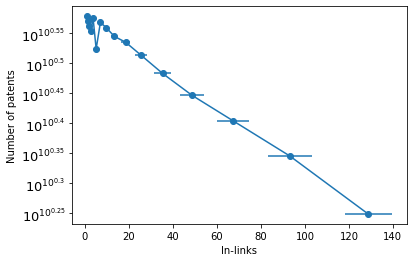

In [459]:
_, ax = plt.subplots(1,1)

bins=np.logspace(0,np.log10(max(df_2class["inlinks_all"])), 19)
index = np.digitize(df_2class["inlinks_all"], bins= bins)
group = df_2class["inlinks_all"].groupby(index)
a = group.count().values

ax.errorbar(bins[:-3], np.log10(np.log10(group.count()))[:-3], xerr = group.std()[:-3], fmt = "o", linestyle = "-")

ax.set_xlabel("In-links")
ax.set_ylabel("Number of patents")
ax.set_yticklabels(new, fontsize = 13)


# OVERALL DATA

## Forward citations (inlinks - all data)

## All together

(200000,) (20,) (20,)


<ipython-input-469-3a597be6ced9>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new, fontsize = 13)


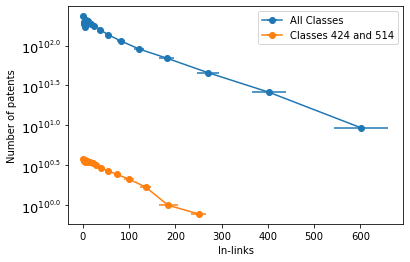

In [469]:
_, ax = plt.subplots(1,1)
bins=np.logspace(0,np.log10(max(df_red["n_fcites"])), 20)
index = np.digitize(df_red["n_fcites"], bins= bins)
group = df_red["n_fcites"].groupby(index)
a = group.count().values[:20]


print(index.shape, a.shape, bins.shape)
ax.errorbar(bins[:-3], np.log(np.log(group.count()[:-3])), xerr =  group.std()[:-3] , fmt = "o", linestyle = "-", label = "All Classes")



bins=np.logspace(0,np.log10(max(df_2class["inlinks_all"])), 20)
index = np.digitize(df_2class["inlinks_all"], bins= bins)
group = df_2class["inlinks_all"].groupby(index)
a = group.count().values
ax.errorbar(bins, np.log10(np.log10(group.count())), xerr =  group.std()   , fmt = "o", linestyle = "-", label = "Classes 424 and 514")



ax.set_xlabel("In-links")
ax.set_ylabel("Number of patents")
ax.set_yticklabels(new, fontsize = 13)

ax.legend()


In [467]:
l = ax.get_yticklabels()
new = []
for index, i in enumerate(l):
    num = i.get_position()[1]
    new.append(matplotlib.text.Text(0, 10**num, "$\\mathdefault{10^{10^{" + str(round(num, 2)) + "}}}$", fontsize = "large"))


(200000,) (10,) (20,)


<ipython-input-465-58d95fac73a7>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new, fontsize = 13)


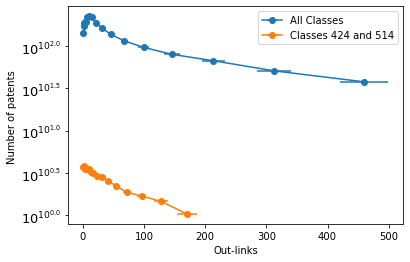

In [465]:
_, ax = plt.subplots(1)
bins=np.logspace(0,np.log10(max(df_red["n_bcites"])), 20)
index = np.digitize(df_red["n_bcites"], bins= bins)
group = df_red["n_bcites"].groupby(index)
a = group.count().values[:10]

print(index.shape, a.shape, bins.shape)
ax.errorbar(bins[:-3], np.log(np.log(group.count()[:-3])), xerr = group.std()[:-3] , fmt = "o", linestyle = "-", label = "All Classes")

bins=np.logspace(0,np.log10(max(df_2class["n_bcites"])), 20)
index = np.digitize(df_2class["n_bcites"], bins= bins)
group = df_2class["n_bcites"].groupby(index)
a = group.count().values
ax.errorbar(bins, np.log10(np.log10(group.count())), xerr = group.std(), fmt = "o", linestyle = "-", label = "Classes 424 and 514")

ax.set_xlabel("Out-links")
ax.set_ylabel("Number of patents ")
ax.set_yticklabels(new, fontsize = 13)
plt.legend()

In [464]:
l = ax.get_yticklabels()
new = []
for index, i in enumerate(l):
    num = i.get_position()[1]
    new.append(matplotlib.text.Text(0, 10**num, "$\\mathdefault{10^{10^{" + str(round(num, 2)) + "}}}$", fontsize = "large"))


(46264,) (11,) (11,)
(46264,) (12,) (11,)
(46264,) (12,) (11,)


<ipython-input-472-6eb00095de47>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new, fontsize = 13)


Text(0, 0.5, 'Number of patents')

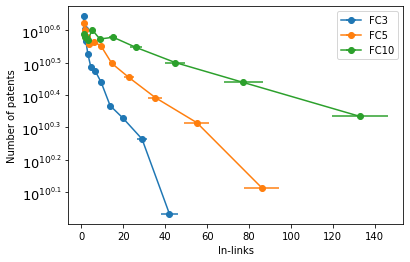

In [472]:
_, ax = plt.subplots(1)


bins=np.logspace(0,np.log10(max(dataset["FC3"])), 11)
index = np.digitize(dataset["FC3"], bins= bins)
group = dataset["FC3"].groupby(index)
a = group.count().values
print(index.shape, a.shape, bins.shape)
ax.errorbar(bins, np.log10(np.log10(group.count())), xerr =  group.std()  , fmt = "o", linestyle = "-", label = "FC3")


bins=np.logspace(0,np.log10(max(dataset["FC5"])), 11)
index = np.digitize(dataset["FC5"], bins= bins)
group = dataset["FC5"].groupby(index)
a = group.count().values
print(index.shape, a.shape, bins.shape)
ax.errorbar(bins, np.log10(np.log10(group.count()[:11])), xerr = group.std()[:11] , fmt = "o", linestyle = "-", label = "FC5")


bins=np.logspace(0,np.log10(max(dataset["FC10"])), 11)
index = np.digitize(dataset["FC10"], bins= bins)
group = dataset["FC10"].groupby(index)
a = group.count().values
print(index.shape, a.shape, bins.shape)
ax.errorbar(bins[:-1], np.log10(np.log10(group.count()[:-2])), xerr = group.std()[:-2] , fmt = "o", linestyle = "-", label = "FC10")
ax.set_yticklabels(new, fontsize = 13)

plt.legend()
plt.xlabel("In-links")
plt.ylabel("Number of patents")
# plt.title("log log of inlinks histogram (log x scale)")

In [471]:
l = ax.get_yticklabels()
new = []
for index, i in enumerate(l):
    num = i.get_position()[1]
    new.append(matplotlib.text.Text(0, 10**num, "$\\mathdefault{10^{10^{" + str(round(num, 2)) + "}}}$", fontsize = "large"))


## Citation curve for the average patent

In [473]:
year_index = []
for index, year in enumerate(range(1990, 2000)):
    yearmin = date(year,1,1)
    yearmax = date(year+1,1,1)
    year_index.append(len(df_melt.loc[(df_melt["issuedate"] > yearmin) & (df_melt["issuedate"] < yearmax)]))

In [5]:
citation_years = np.zeros((10, 10))
n_citation_years = np.zeros(10)

for y_index, year in enumerate(range(1990, 2000)):
#     print(year1)
    patents = df_424.loc[(df_424["issuedate"] > date(year,1,1))\
                         &(df_424["issuedate"] < date(year+1,1,1))]["patent"]
    
    for itr, patent in enumerate(patents):
        #print(patent)
        for index, _ in enumerate(range(year, 2000)):
            try:
                index = index + y_index
                d = df_melt[sum(year_index[:index]):sum(year_index[:index + 1])]

#                 print(d["cited"].dtype)
                citation_years[y_index][index] += len(d.loc[(d["cited"] == int(patent) )])
            
            except Exception as e:
                print(patent, "EXCEPTION: ", e)
                
        n_citation_years[y_index] += 1
        
        if itr % 1000 == 0 and itr != 0 :
            break


            
    print(year, "/", 2000)

Text(0.5, 1.0, 'Average number of citations for patents released each year')

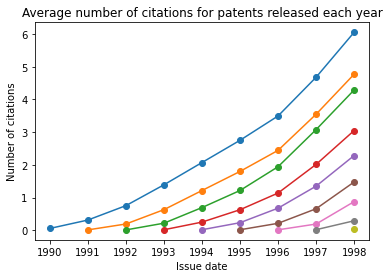

In [482]:
plot_cumulative = []
for row in av:
    plt.errorbar(range(1989, 1999), [np.sum(row[:index]) if sum(row[:index]) != 0 else np.nan for index, i in enumerate(av)], fmt = "o", linestyle = "-")

plt.xlabel("Issue date")
plt.ylabel("Number of citations")
plt.title("Average number of citations for patents released each year")

In [8]:
citation_years = np.zeros((10, 10))
n_citation_years = np.zeros(10)

for y_index, year in enumerate(range(1990, 2000)):
#     print(year1)
    patents = df_2class.loc[(df_2class["issuedate"] > date(year,1,1))\
                         &(df_2class["issuedate"] < date(year+1,1,1))]["patent"]
    
    for itr, patent in enumerate(patents):
        #print(patent)
        for index, _ in enumerate(range(year, 2000)):
            try:
                index = index + y_index
                d = df_melt[sum(year_index[:index]):sum(year_index[:index + 1])]

#                 print(d["cited"].dtype)
                citation_years[y_index][index] += len(d.loc[(d["cited"] == int(patent) )])
            
            except Exception as e:
                print(patent, "EXCEPTION: ", e)
                
        n_citation_years[y_index] += 1
        
        if itr % 1000 == 0 and itr != 0 :
            break


            
    print(year, "/", 2000)

In [485]:
np.set_printoptions(precision=2)
av = citation_years/n_citation_years

Text(0.5, 1.0, 'Average number of citations for patents released each year')

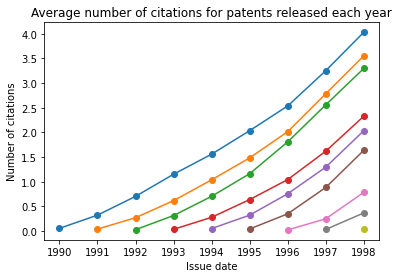

In [486]:
plot_cumulative = []
for row in av:
    plt.errorbar(range(1989, 1999), [np.sum(row[:index]) if sum(row[:index]) != 0 else np.nan for index, i in enumerate(av)], fmt = "o", linestyle = "-")

plt.xlabel("Issue date")
plt.ylabel("Number of citations")
plt.title("Average number of citations for patents released each year")

In [492]:
#range(2000-2010 and class 424)
df_2class_2010 = df.loc[((df["class"].values == "424") \
               |    (df["class"].values == 424)   \
               |    (df["class"].values == "514") \
               |    (df["class"].values == 514)    )  \
               &    (df["issuedate"] > date(1990, 1,1) )\
               &    (df["issuedate"] < date(2010,1,1))]

In [501]:
df_2class_2010["issuedate"] = pd.to_datetime(df_2class_2010 ["issuedate"]).dt.date

In [536]:
year_index_together = []
for index, year in enumerate(range(1990, 2010)):
    yearmin = date(year,1,1)
    yearmax = date(year+1,1,1)
    year_index_together.append(len(df_melt_424.loc[(df_melt_424["issuedate"] > yearmin) & (df_melt_424["issuedate"] < yearmax)]))

In [9]:
citation_years = np.zeros((10, 20))
n_citation_years = np.zeros(20)

for y_index, year in enumerate(range(1990, 2000)):
    patents = df_424.loc[(df_424["issuedate"] > date(year,1,1))\
                         &(df_424["issuedate"] < date(year+1,1,1))]["patent"]
    
    for itr, patent in enumerate(patents):
        for index, _ in enumerate(range(year, 2010)):
            try:
                index = index + y_index
                d = df_melt_424[sum(year_index_together[:index]):sum(year_index_together[:index + 1])]
                citation_years[y_index][index] += len(d.loc[(d["cited"] == int(patent) )])

            except Exception as e:
                print(patent, "EXCEPTION: ", e)

        if itr % 1000 == 0 and itr != 0 :
            break
        
    print(year, "/", 2000)

In [539]:
np.set_printoptions(precision=2)
av = citation_years/1000

Text(0, 0.5, 'Number of In-link citations')

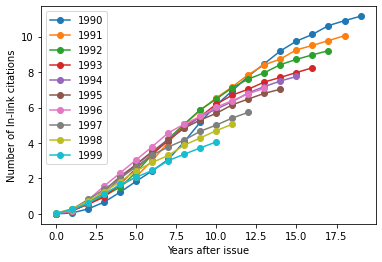

In [557]:
plot_cumulative = []
import math
for ind, row in enumerate(av):
    a = [np.sum(row[ind:ind+index]) if sum(row[ind:ind+index]) != sum(row[ind:ind+index-1]) else np.nan for index in range(20)]#[ind:ind + 10]

    if math.isnan(a[0]):
        a = a[1:]
        a.append(np.nan)
    plt.errorbar(range(0, 20), a, fmt = "o", linestyle = "-", label = str(1990 + ind))

plt.legend()
plt.xlabel("Years after issue")
plt.ylabel("Number of In-link citations")
# plt.title("Average number of citations for patents released each year")

Text(0.5, 1.0, 'Average number of citations for patents released each year (10 years after issue)')

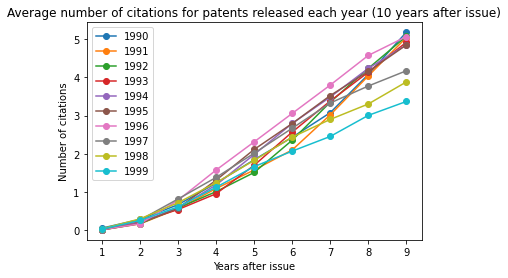

In [542]:
plot_cumulative = []
for ind, row in enumerate(av):
    a = [np.sum(row[ind:ind+index]) if sum(row[ind:ind+index]) != 0 else np.nan for index in range(10)]#[ind:ind + 10]
#     print(len(a))
    plt.errorbar(range(0, 10), a, fmt = "o", linestyle = "-", label = str(1990 + ind))

plt.legend()
plt.xlabel("Years after issue")
plt.ylabel("Number of citations")
plt.title("Average number of citations for patents released each year (10 years after issue)")